## 1st - We clean the Data of the Test to be ready

In [99]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\matane\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py39hcbf5309_0         1.0 MB  conda-forge
    imbalanced-learn-0.9.0     |     pyhd8ed1ab_0         115 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.9.0-pyhd8ed1ab_0
  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.12.0-py39haa95532_0 --> cond

In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [3]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install imblearn  


  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as pca
from imblearn.over_sampling import SMOTE
import imblearn
from imblearn.over_sampling import ADASYN

In [6]:
# pip install -U imbalanced-learn

In [7]:
# pip install imblearn  

In [8]:
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import ADASYN

In [12]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install pydotplus

  Using cached pydotplus-2.0.2.tar.gz (278 kB)
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=bb0f540bc106fb2cf7acd9b7272e35e0fc5f417d62ac6e56be8cf5856dd71c6d
  Stored in directory: c:\users\matane\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [14]:

from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics  
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

In [15]:
# for inline plots in jupyter
%matplotlib inline 

In [16]:
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)}) # settings for seaborn plot sizes

In [17]:
df = pd.read_csv("Marketing_Campaign_Train.csv")

In [18]:
print("Shape: ", df.shape)
df.info()

Shape:  (1680, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1680 non-null   int64  
 1   Year_Birth             1651 non-null   float64
 2   Education              1672 non-null   object 
 3   Status                 1646 non-null   object 
 4   Income                 1609 non-null   float64
 5   Num_of_kids            1672 non-null   float64
 6   Num_of_Teen            1660 non-null   float64
 7   Registration_date      1680 non-null   object 
 8   Recency                1680 non-null   int64  
 9   Mnt_Fruits             1673 non-null   float64
 10  Mnt_Meat               1673 non-null   float64
 11  Mnt_sweet              1659 non-null   float64
 12  Mnt_Wines              1673 non-null   float64
 13  Mnt_Gold_Products      1673 non-null   float64
 14  Mnt_Fish               1673 non-null 

In [19]:
df['Age'] = 2022 - df['Year_Birth'] # add column for convient of the Age
df['Age']

0       43.0
1       51.0
2       31.0
3       55.0
4       40.0
        ... 
1675    32.0
1676    66.0
1677    60.0
1678    45.0
1679    66.0
Name: Age, Length: 1680, dtype: float64

In [20]:
df.replace('unknown',np.nan,inplace = True) # maybe to remove -unneccery

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1680 non-null   int64  
 1   Year_Birth             1651 non-null   float64
 2   Education              1672 non-null   object 
 3   Status                 1646 non-null   object 
 4   Income                 1609 non-null   float64
 5   Num_of_kids            1672 non-null   float64
 6   Num_of_Teen            1660 non-null   float64
 7   Registration_date      1680 non-null   object 
 8   Recency                1680 non-null   int64  
 9   Mnt_Fruits             1673 non-null   float64
 10  Mnt_Meat               1673 non-null   float64
 11  Mnt_sweet              1659 non-null   float64
 12  Mnt_Wines              1673 non-null   float64
 13  Mnt_Gold_Products      1673 non-null   float64
 14  Mnt_Fish               1673 non-null   float64
 15  Num_

In [22]:
df[df.isnull().sum(axis=1)>7]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age
1659,1419,1950.0,Graduation,Together,34026.0,1.0,1.0,05/08/2013,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,72.0
1662,9284,1958.0,Graduation,Together,53977.0,0.0,1.0,08/06/2013,21,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,64.0
1663,3673,1971.0,Graduation,Single,55239.0,0.0,1.0,14/07/2013,59,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,51.0
1665,10983,1952.0,Graduation,Together,75278.0,0.0,0.0,29/01/2013,17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,70.0
1666,2611,1959.0,Master,Together,82576.0,0.0,0.0,01/08/2012,66,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,63.0
1673,979,1975.0,Graduation,Single,33249.0,1.0,0.0,20/02/2013,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,47.0
1675,8278,1990.0,PhD,Married,74214.0,0.0,0.0,26/08/2012,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,32.0


In [23]:
# df=df.drop(df.index[df.isnull().sum(axis=1)>7])

In [24]:
print("Shape: ", df.shape)
df.head()
df.info()

Shape:  (1680, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1680 non-null   int64  
 1   Year_Birth             1651 non-null   float64
 2   Education              1672 non-null   object 
 3   Status                 1646 non-null   object 
 4   Income                 1609 non-null   float64
 5   Num_of_kids            1672 non-null   float64
 6   Num_of_Teen            1660 non-null   float64
 7   Registration_date      1680 non-null   object 
 8   Recency                1680 non-null   int64  
 9   Mnt_Fruits             1673 non-null   float64
 10  Mnt_Meat               1673 non-null   float64
 11  Mnt_sweet              1659 non-null   float64
 12  Mnt_Wines              1673 non-null   float64
 13  Mnt_Gold_Products      1673 non-null   float64
 14  Mnt_Fish               1673 non-null 

In [25]:
data = df.drop(['ID','Year_Birth'], axis = 1)

In [26]:
numeric_col = data.describe().columns # to get the numeric column
numeric_col

Index(['Income', 'Num_of_kids', 'Num_of_Teen', 'Recency', 'Mnt_Fruits',
       'Mnt_Meat', 'Mnt_sweet', 'Mnt_Wines', 'Mnt_Gold_Products', 'Mnt_Fish',
       'Num_Web_Purchases', 'Num_Store_Purchases', 'Num_Deals_Purchases',
       'Num_Catalog_Purchases', 'Num_Web_Visits', 'Response_Campaign_1',
       'Response_Campaign_2', 'Response_Campaign_3', 'Response_Campaign_4',
       'Response_Campaign_5', 'Complain', 'Cost_Contact', 'Revenue',
       'Response', 'Age'],
      dtype='object')

## split the Data for numveric and nominal

In [27]:
numeric_data = data[numeric_col] # numeric data
numeric_data

,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age
0,NaN,1.0,0.0,42,1.0,1.0,1725.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,43.0
1,1730.0,0.0,0.0,65,1.0,1.0,3.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,51.0
2,8028.0,0.0,0.0,62,73.0,18.0,66.0,7.0,12.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,31.0
3,67309.0,1.0,1.0,76,515.0,47.0,181.0,149.0,95.0,95.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,55.0
4,160803.0,0.0,0.0,21,55.0,16.0,1622.0,17.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,74214.0,0.0,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,32.0
1676,34941.0,1.0,1.0,26,39.0,2.0,25.0,4.0,3.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,66.0
1677,56067.0,0.0,1.0,51,517.0,12.0,54.0,16.0,6.0,120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,60.0
1678,56628.0,0.0,1.0,30,479.0,5.0,82.0,7.0,17.0,171.0,...,1.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,45.0


In [28]:
nominal_data = data.drop(numeric_col, axis=1) # nominal data
nominal_data

,Education,Status,Registration_date
0,Graduation,Married,06/01/2013
1,Graduation,Divorced,18/05/2014
2,Graduation,Single,18/09/2012
3,2n Cycle,Together,23/01/2013
4,PhD,Married,04/08/2012
...,...,...,...
1675,PhD,Married,26/08/2012
1676,Master,Together,06/03/2013
1677,PhD,Together,20/07/2013
1678,Graduation,Single,21/03/2014


<AxesSubplot:ylabel='Income'>

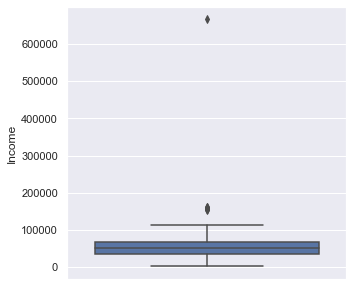

In [29]:
sns.boxplot(y="Income", data=df)

In [30]:
df[df['Income']>110000]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age
4,1501,1982.0,PhD,Married,160803.0,0.0,0.0,04/08/2012,21,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,40.0
5,8475,1973.0,PhD,Married,157243.0,0.0,1.0,01/03/2014,98,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,49.0
276,9432,1977.0,Graduation,Together,666666.0,1.0,0.0,02/06/2013,23,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,45.0
1628,5555,1975.0,Graduation,Divorced,153924.0,0.0,0.0,07/02/2014,81,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,47.0
1631,4619,1945.0,PhD,Single,113734.0,0.0,0.0,28/05/2014,9,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,77.0
1636,11181,1949.0,PhD,Married,156924.0,0.0,0.0,29/08/2013,85,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,73.0
1645,1503,1976.0,PhD,Together,162397.0,1.0,1.0,03/06/2013,31,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,46.0
1646,4931,1977.0,Graduation,Together,157146.0,0.0,0.0,29/04/2013,13,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,45.0


In [31]:
# get out the rich man
df.at[531, 'Income'] = 110000
# df=df.drop(df.index[df['Income']>110000])


### 2. Filling missing values by exploring correlations. 

In [32]:
# df['Education_cat'] = df['Education'].astype('category').cat.codes
# df['Status_cat'] = df['Status'].astype('category').cat.codes


In [33]:
# df.groupby(['Status','Status_cat']).size()

In [34]:
df.corr(method = 'pearson')

,ID,Year_Birth,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age
ID,1.000000,0.005672,0.006549,0.001637,-0.008020,-0.038644,-0.036566,0.003228,-0.011776,-0.022015,...,-0.042303,-0.035472,-0.031090,-0.029670,-0.025612,0.015002,NaN,NaN,-0.033697,-0.005672
Year_Birth,0.005672,1.000000,-0.148987,0.227510,-0.380150,-0.017887,-0.154247,-0.017607,-0.016340,-0.030138,...,0.056405,-0.056817,-0.007810,-0.011766,-0.008027,-0.030025,NaN,NaN,0.011223,-1.000000
Income,0.006549,-0.148987,1.000000,-0.399329,0.030229,-0.002274,0.547689,0.399809,0.571219,0.405666,...,-0.004179,0.180870,0.312827,0.251677,0.083199,-0.008579,NaN,NaN,0.121886,0.148987
Num_of_kids,0.001637,0.227510,-0.399329,1.000000,-0.035422,0.020407,-0.491078,-0.372687,-0.433707,-0.379327,...,0.000443,-0.157965,-0.201089,-0.163770,-0.080937,0.013823,NaN,NaN,-0.074168,-0.227510
Num_of_Teen,-0.008020,-0.380150,0.030229,-0.035422,1.000000,0.024401,0.034139,-0.163352,-0.256109,-0.187557,...,-0.030790,0.057977,-0.176255,-0.114409,0.003888,0.028625,NaN,NaN,-0.145720,0.380150
Recency,-0.038644,-0.017887,-0.002274,0.020407,0.024401,1.000000,0.026181,0.010561,0.038119,-0.002121,...,-0.050367,0.022159,0.003421,-0.041583,-0.009288,0.012054,NaN,NaN,-0.211211,0.017887
Mnt_Fruits,-0.036566,-0.154247,0.547689,-0.491078,0.034139,0.026181,1.000000,0.379299,0.562852,0.388012,...,0.077275,0.388082,0.490480,0.371592,0.217895,-0.027037,NaN,NaN,0.241540,0.154247
Mnt_Meat,0.003228,-0.017607,0.399809,-0.372687,-0.163352,0.010561,0.379299,1.000000,0.555836,0.568425,...,0.013121,0.012921,0.205304,0.178326,-0.014198,0.000759,NaN,NaN,0.118691,0.017607
Mnt_sweet,-0.011776,-0.016340,0.571219,-0.433707,-0.256109,0.038119,0.562852,0.555836,1.000000,0.560185,...,0.024587,0.079955,0.375728,0.299070,0.028022,-0.013476,NaN,NaN,0.239992,0.016340
Mnt_Wines,-0.022015,-0.030138,0.405666,-0.379327,-0.187557,-0.002121,0.388012,0.568425,0.560185,1.000000,...,0.003202,0.013389,0.198496,0.240151,-0.001256,-0.015796,NaN,NaN,0.108074,0.030138


<AxesSubplot:>

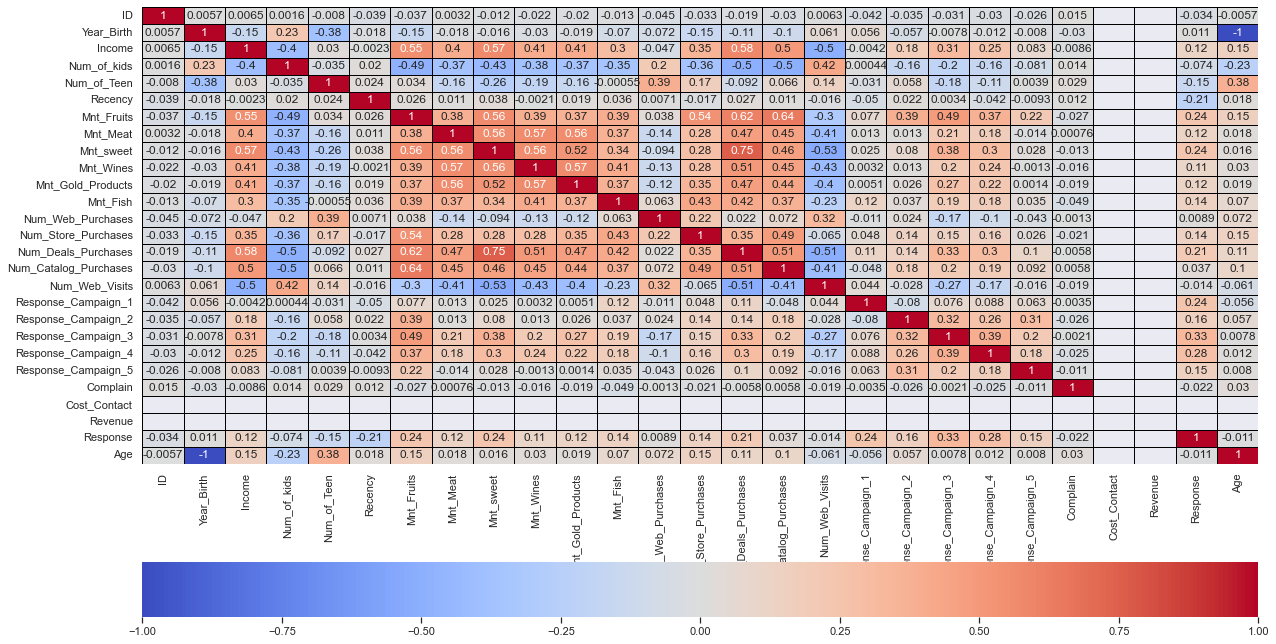

In [35]:
# heat map
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.7, linecolor='black', cbar_kws= {'orientation': 'horizontal'})

In [36]:
# df.info()
# # df[df.isnull().sum(axis=1)>5]

## search for coorrelation to fill the missing age

In [37]:
# g = sns.FacetGrid(df, col='Num_of_Teen')
# g.map(plt.hist, 'Year_Birth', bins=20);

In [38]:
for i in df['Num_of_Teen'].unique(): 
    df['Age'][df['Num_of_Teen']==i].median()
    print('For class ', i, ' the median is ', df.loc[df['Num_of_Teen']==i , 'Age'].median())
    print('and the number of missing values is ', df.loc[df['Num_of_Teen']==i , 'Age'].isnull().sum(), 
          'out of ',(df['Num_of_Teen']==i).sum(), 'rows')

For class  0.0  the median is  46.0
and the number of missing values is  10 out of  862 rows
For class  1.0  the median is  57.0
and the number of missing values is  11 out of  760 rows
For class  2.0  the median is  58.0
and the number of missing values is  0 out of  38 rows
For class  nan  the median is  nan
and the number of missing values is  0 out of  0 rows


In [39]:
for i in [0.0,1.0]:
    df.loc[df['Num_of_Teen']==i , 'Age'] = df['Age'][df['Num_of_Teen']==i].fillna(value=df['Age'][df['Num_of_Teen']==i].median())
# df.info()

In [40]:
df[df['Age'].isnull()==True]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age
502,5985,NaN,NaN,NaN,NaN,NaN,NaN,13/10/2012,0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN
509,9699,NaN,NaN,NaN,NaN,NaN,NaN,21/12/2013,12,357.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN
634,2587,NaN,NaN,NaN,NaN,NaN,NaN,15/05/2014,21,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN
936,1544,NaN,NaN,NaN,NaN,NaN,NaN,22/12/2012,51,741.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN
1151,2431,NaN,NaN,NaN,NaN,NaN,NaN,31/12/2012,70,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN
1464,10451,NaN,NaN,NaN,NaN,NaN,NaN,12/03/2013,6,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN
1502,6437,NaN,NaN,NaN,NaN,NaN,NaN,19/06/2013,80,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN
1639,7627,NaN,NaN,NaN,NaN,NaN,NaN,12/12/2012,25,817.0,...,0.0,0.0,1.0,1.0,0.0,0.0,3.0,11.0,1,NaN


In [41]:
# נשאר עוד כמה אנשים ללא גיל -נמלא אותם בשכיח\ או ממוצע
mean_age = df['Age'].mean()
mean_age
df['Age'] = df['Age'].fillna(mean_age)

In [42]:
df['Age'] = df['Age'].fillna(mean_age)

In [43]:
df[df['Education'].isnull()==True]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age
502,5985,NaN,NaN,NaN,NaN,NaN,NaN,13/10/2012,0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,52.937799
509,9699,NaN,NaN,NaN,NaN,NaN,NaN,21/12/2013,12,357.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,52.937799
634,2587,NaN,NaN,NaN,NaN,NaN,NaN,15/05/2014,21,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,52.937799
936,1544,NaN,NaN,NaN,NaN,NaN,NaN,22/12/2012,51,741.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,52.937799
1151,2431,NaN,NaN,NaN,NaN,NaN,NaN,31/12/2012,70,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,52.937799
1464,10451,NaN,NaN,NaN,NaN,NaN,NaN,12/03/2013,6,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,52.937799
1502,6437,NaN,NaN,NaN,NaN,NaN,NaN,19/06/2013,80,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,52.937799
1639,7627,NaN,NaN,NaN,NaN,NaN,NaN,12/12/2012,25,817.0,...,0.0,0.0,1.0,1.0,0.0,0.0,3.0,11.0,1,52.937799


In [44]:
mode = df['Education'].mode()[0]
mode

'Graduation'

In [45]:
df['Education'] = df['Education'].fillna(mode)

In [46]:
df['Education_cat'] = df['Education'].astype('category').cat.codes

In [47]:
df.groupby(['Education','Education_cat']).size()

Education   Education_cat
2n Cycle    0                147
Basic       1                 47
Graduation  2                838
Master      3                282
PhD         4                366
dtype: int64

In [48]:
df[df['Status'].isnull()==True]
has_kids = df[df['Num_of_kids']>0]
fill = has_kids[has_kids['Status'].isnull()]
fill

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age,Education_cat
72,5552,1963.0,Master,NaN,48721.0,1.0,1.0,13/05/2013,50,81.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,59.0,3
363,10755,1976.0,2n Cycle,NaN,NaN,1.0,0.0,02/09/2013,76,6.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,46.0,0
555,2139,1975.0,Master,NaN,7500.0,1.0,0.0,02/10/2013,19,3.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,47.0,3
595,5342,1976.0,Basic,NaN,9548.0,1.0,0.0,08/08/2012,31,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,46.0,1
693,1461,1965.0,PhD,NaN,36921.0,1.0,1.0,28/07/2013,74,17.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,57.0,4
830,6182,1984.0,Graduation,NaN,26646.0,1.0,0.0,10/02/2014,26,11.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,38.0,2
1124,5899,1950.0,PhD,NaN,5648.0,1.0,1.0,13/03/2014,68,28.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,72.0,4
1405,7386,1976.0,Graduation,NaN,30992.0,1.0,0.0,22/04/2013,83,17.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,46.0,2
1552,4855,1974.0,PhD,NaN,30351.0,1.0,0.0,06/06/2013,19,14.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1,48.0,4


In [49]:
## ERROR איך למלא עמודות שבהם יש רק ילדים להפוך להיות נשואים בסטטוס
mode = df['Status'].mode()[0]
df['Status'] = df['Status'].fillna(mode)

In [50]:

df['Status_cat'] = df['Status'].astype('category').cat.codes

In [51]:
df.groupby(['Status','Status_cat']).size()
# df.head()--בעיה מוזרה שמייצר שלילי

Status    Status_cat
Alone     0               2
Divorced  1             159
Married   2             687
Single    3             356
Together  4             424
Widow     5              52
dtype: int64

## fix the missing Num_Web_Purchases

In [52]:
df[df['Num_Web_Purchases'].isnull()==True]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat
1651,4119,1963.0,Master,Together,38620.0,0.0,0.0,11/05/2013,56,112.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,59.0,3,4
1652,9743,1955.0,Graduation,Married,76998.0,0.0,1.0,11/01/2013,85,1449.0,...,1.0,0.0,0.0,0.0,3.0,11.0,0,67.0,2,2
1653,5300,1973.0,Master,Married,38961.0,1.0,0.0,30/12/2013,60,19.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,49.0,3,2
1654,851,1972.0,Master,Married,57136.0,1.0,1.0,09/07/2013,48,306.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,50.0,3,2
1655,569,1991.0,Graduation,Single,90273.0,0.0,0.0,14/12/2013,32,704.0,...,1.0,1.0,0.0,0.0,3.0,11.0,1,31.0,2,3
1656,7712,1946.0,PhD,Single,62159.0,0.0,0.0,28/04/2014,68,182.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,76.0,4,3
1657,8093,1969.0,Master,Married,79734.0,0.0,0.0,28/06/2014,72,572.0,...,0.0,1.0,0.0,0.0,3.0,11.0,0,53.0,3,2
1658,5117,1963.0,2n Cycle,Married,32632.0,0.0,0.0,02/08/2012,32,63.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,59.0,0,2
1659,1419,1950.0,Graduation,Together,34026.0,1.0,1.0,05/08/2013,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,72.0,2,4
1660,1291,1978.0,PhD,Together,27683.0,1.0,0.0,04/08/2012,90,152.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,44.0,4,4


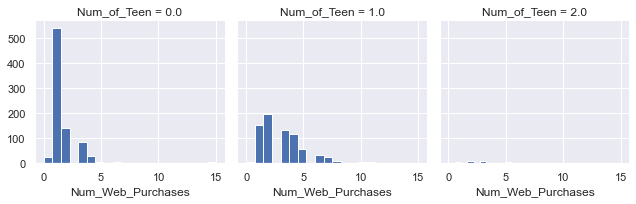

In [53]:
g = sns.FacetGrid(df, col='Num_of_Teen')
g.map(plt.hist, 'Num_Web_Purchases', bins=20);

In [54]:
for i in df['Num_of_Teen'].unique(): 
    df['Num_Web_Purchases'][df['Num_of_Teen']==i].median()
    print('For class ', i, ' the median is ', df.loc[df['Num_of_Teen']==i , 'Num_Web_Purchases'].median())
    print('and the number of missing values is ', df.loc[df['Num_of_Teen']==i , 'Num_Web_Purchases'].isnull().sum(), 
          'out of ',(df['Num_of_Teen']==i).sum(), 'rows')

For class  0.0  the median is  1.0
and the number of missing values is  15 out of  862 rows
For class  1.0  the median is  3.0
and the number of missing values is  14 out of  760 rows
For class  2.0  the median is  3.0
and the number of missing values is  0 out of  38 rows
For class  nan  the median is  nan
and the number of missing values is  0 out of  0 rows


In [55]:
for i in [0.0,1.0,2.0]:
    df.loc[df['Num_of_Teen']==i , 'Num_Web_Purchases'] = df['Num_Web_Purchases'][df['Num_of_Teen']==i].fillna(value=df['Num_Web_Purchases'][df['Num_of_Teen']==i].median())
df[df['Num_Web_Purchases'].isnull()==True]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat


In [56]:
# df.info()

# ילדים ומתגברים לא חסר הרבה נשלים לפי הרוב 


In [57]:
mode = df['Num_of_kids'].mode()[0]
mode
df['Num_of_kids'] = df['Num_of_kids'].fillna(mode)

In [58]:
# ילדים ומתגברים לא חסר הרבה נשלים לפי הרוב 
mode = df['Num_of_Teen'].mode()[0]
mode
df['Num_of_Teen'] = df['Num_of_Teen'].fillna(mode)

## Now checek IncomeNow checek Income
For Income we will generate random values from a similar distribution. (there are some connection but to do somthing else)

In [59]:
df[df['Income'].isnull()==True]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat
0,5376,1979.0,Graduation,Married,NaN,1.0,0.0,06/01/2013,42,1.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,43.000000,2,2
10,2408,1976.0,Graduation,Married,NaN,1.0,1.0,20/11/2012,20,490.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,46.000000,2,2
93,2863,1970.0,Graduation,Single,NaN,1.0,2.0,23/08/2013,67,738.0,...,0.0,1.0,0.0,0.0,3.0,11.0,0,52.000000,2,3
142,5909,1964.0,Graduation,Married,NaN,0.0,1.0,19/09/2013,25,895.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,58.000000,2,2
297,5370,1973.0,PhD,Married,NaN,1.0,0.0,16/01/2013,38,239.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,49.000000,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,2471,1965.0,Graduation,Married,NaN,0.0,0.0,27/06/2014,39,48.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,57.000000,2,2
1562,3749,1973.0,Graduation,Together,NaN,0.0,0.0,02/03/2013,54,627.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,49.000000,2,4
1639,7627,NaN,Graduation,Married,NaN,0.0,0.0,12/12/2012,25,817.0,...,1.0,1.0,0.0,0.0,3.0,11.0,1,52.937799,2,2
1649,5255,1986.0,Graduation,Single,NaN,1.0,0.0,20/02/2013,19,5.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,36.000000,2,3


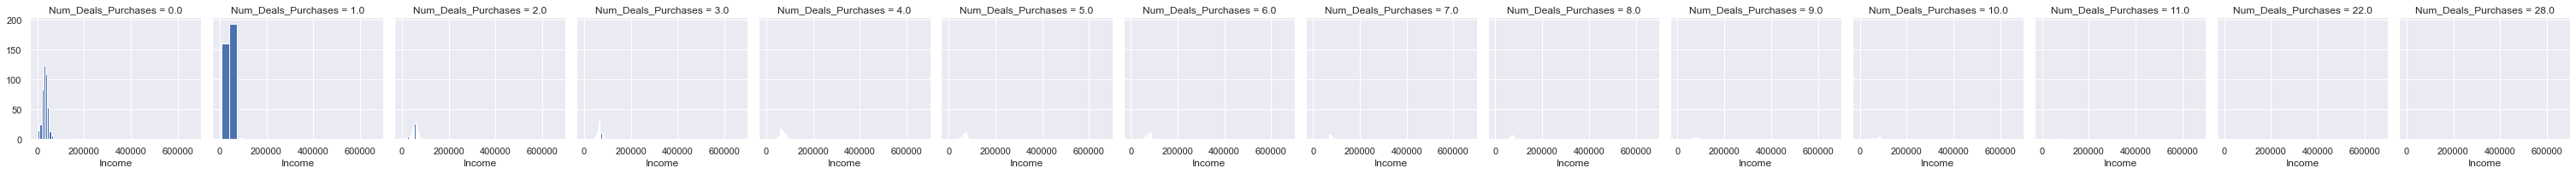

In [60]:
g = sns.FacetGrid(df, col='Num_Deals_Purchases')
g.map(plt.hist, 'Income', bins=20);

In [61]:
for i in df['Num_Deals_Purchases'].unique(): 
    df['Income'][df['Num_Deals_Purchases']==i].median()
    print('For class ', i, ' the median is ', df.loc[df['Num_Deals_Purchases']==i , 'Income'].median())
    print('and the number of missing values is ', df.loc[df['Num_Deals_Purchases']==i , 'Income'].isnull().sum(), 
          'out of ',(df['Num_Deals_Purchases']==i).sum(), 'rows')

For class  28.0  the median is  158974.5
and the number of missing values is  1 out of  3 rows
For class  0.0  the median is  31788.0
and the number of missing values is  23 out of  456 rows
For class  1.0  the median is  41685.5
and the number of missing values is  17 out of  375 rows
For class  6.0  the median is  75739.5
and the number of missing values is  3 out of  99 rows
For class  22.0  the median is  157243.0
and the number of missing values is  0 out of  1 rows
For class  2.0  the median is  55707.0
and the number of missing values is  7 out of  202 rows
For class  4.0  the median is  66303.0
and the number of missing values is  4 out of  137 rows
For class  3.0  the median is  64340.0
and the number of missing values is  4 out of  126 rows
For class  5.0  the median is  69556.0
and the number of missing values is  6 out of  90 rows
For class  9.0  the median is  79416.0
and the number of missing values is  2 out of  36 rows
For class  8.0  the median is  71939.0
and the numb

In [62]:
for i in [2,3,1,10,11,5,0]:
    df.loc[df['Num_Deals_Purchases']==i , 'Income'] = df['Income'][df['Num_Deals_Purchases']==i].fillna(value=df['Income'][df['Num_Deals_Purchases']==i].median())
df[df['Income'].isnull()==True]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat
0,5376,1979.0,Graduation,Married,NaN,1.0,0.0,06/01/2013,42,1.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,43.0,2,2
10,2408,1976.0,Graduation,Married,NaN,1.0,1.0,20/11/2012,20,490.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,46.0,2,2
142,5909,1964.0,Graduation,Married,NaN,0.0,1.0,19/09/2013,25,895.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,58.0,2,2
443,2926,1952.0,Master,Together,NaN,0.0,1.0,23/08/2012,62,1241.0,...,0.0,0.0,1.0,0.0,3.0,11.0,0,70.0,3,4
521,2574,1977.0,PhD,Married,NaN,0.0,1.0,31/01/2013,27,1050.0,...,0.0,1.0,1.0,0.0,3.0,11.0,1,45.0,4,2
648,7899,1952.0,PhD,Married,NaN,0.0,1.0,29/10/2012,70,1245.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,70.0,4,2
999,10673,1976.0,PhD,Married,NaN,0.0,1.0,17/11/2013,6,760.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,46.0,4,2
1202,1772,1975.0,PhD,Married,NaN,0.0,0.0,11/01/2013,2,1074.0,...,1.0,1.0,0.0,0.0,3.0,11.0,1,47.0,4,2
1221,5798,1973.0,Master,Together,NaN,0.0,0.0,23/11/2013,87,445.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,49.0,3,4
1252,9529,1990.0,Graduation,Married,NaN,0.0,0.0,28/11/2013,8,559.0,...,0.0,1.0,0.0,0.0,3.0,11.0,1,32.0,2,2


## fix missinig on swets and cmapign 1

In [63]:
mean_sweet = df['Mnt_sweet'].mean()
mean_sweet
df['Mnt_sweet'] = df['Mnt_sweet'].fillna(mean_sweet)

In [64]:
mode = df['Response_Campaign_1'].mode()[0]
df['Response_Campaign_1'] = df['Response_Campaign_1'].fillna(mode)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1680 non-null   int64  
 1   Year_Birth             1651 non-null   float64
 2   Education              1680 non-null   object 
 3   Status                 1680 non-null   object 
 4   Income                 1667 non-null   float64
 5   Num_of_kids            1680 non-null   float64
 6   Num_of_Teen            1680 non-null   float64
 7   Registration_date      1680 non-null   object 
 8   Recency                1680 non-null   int64  
 9   Mnt_Fruits             1673 non-null   float64
 10  Mnt_Meat               1673 non-null   float64
 11  Mnt_sweet              1680 non-null   float64
 12  Mnt_Wines              1673 non-null   float64
 13  Mnt_Gold_Products      1673 non-null   float64
 14  Mnt_Fish               1673 non-null   float64
 15  Num_

## Now clean the colomus still not number
### than, Normalized

In [65]:

# df.info()
# df = df.drop(['Education'], axis = 1)

In [66]:
# take care of the Registeration date
df[['Registration_date_day', 'Registration_date_month', 'Registration_date_year']] = df['Registration_date'].str.split('/', expand=True)
df['Registration_date_day'] = df['Registration_date_day'].astype(float)
df['Registration_date_month'] = df['Registration_date_month'].astype(float)
df['Registration_date_year'] = df['Registration_date_year'].astype(float)
df= df.drop(['Registration_date'], axis=1)
df.head()

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,...,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat,Registration_date_day,Registration_date_month,Registration_date_year
0,5376,1979.0,Graduation,Married,NaN,1.0,0.0,42,1.0,1.0,...,0.0,3.0,11.0,0,43.0,2,2,6.0,1.0,2013.0
1,6862,1971.0,Graduation,Divorced,1730.0,0.0,0.0,65,1.0,1.0,...,0.0,3.0,11.0,0,51.0,2,1,18.0,5.0,2014.0
2,10749,1991.0,Graduation,Single,8028.0,0.0,0.0,62,73.0,18.0,...,0.0,3.0,11.0,0,31.0,2,3,18.0,9.0,2012.0
3,238,1967.0,2n Cycle,Together,67309.0,1.0,1.0,76,515.0,47.0,...,0.0,3.0,11.0,0,55.0,0,4,23.0,1.0,2013.0
4,1501,1982.0,PhD,Married,160803.0,0.0,0.0,21,55.0,16.0,...,0.0,3.0,11.0,0,40.0,4,2,4.0,8.0,2012.0


In [67]:

## הסבר: בתחילה חשבנו שניתן למחוק רשומות שהפריעו לנו ולכן ביצענו את כל הניקוי כך,
## לאחר מכן הבנו שזה בעייתי 
## לכן חזרנו על כל הפעולות מחדש ללא מחיקת רשומות, זה עבד מאוד טוב וכרגע נשאר רק פערים קטנים
## וכעת נשלים אותם עם השכיח או הממוצע שלהם ציק צק
# לפי שכיח

# Mnt_Fruits
mode = df['Mnt_Fruits'].mode()[0]
df['Mnt_Fruits'] = df['Mnt_Fruits'].fillna(mode)

# Mnt_Meat
mode = df['Mnt_Meat'].mode()[0]
df['Mnt_Meat'] = df['Mnt_Meat'].fillna(mode)

# Mnt_Fish
mode = df['Mnt_Fish'].mode()[0]
df['Mnt_Fish'] = df['Mnt_Fish'].fillna(mode)

# Mnt_Gold_Products
mode = df['Mnt_Gold_Products'].mode()[0]
df['Mnt_Gold_Products'] = df['Mnt_Gold_Products'].fillna(mode)

# Mnt_Wines
mode = df['Mnt_Wines'].mode()[0]
df['Mnt_Wines'] = df['Mnt_Wines'].fillna(mode)

# Num_Web_Visits
mode = df['Num_Web_Visits'].mode()[0]
df['Num_Web_Visits'] = df['Num_Web_Visits'].fillna(mode)

# Num_Store_Purchases
mode = df['Num_Store_Purchases'].mode()[0]
df['Num_Store_Purchases'] = df['Num_Store_Purchases'].fillna(mode)

# Num_Web_Visits
mode = df['Num_Web_Visits'].mode()[0]
df['Num_Web_Visits'] = df['Num_Web_Visits'].fillna(mode)

# Num_Deals_Purchases
mode = df['Num_Deals_Purchases'].mode()[0]
df['Num_Deals_Purchases'] = df['Num_Deals_Purchases'].fillna(mode)

# Num_Catalog_Purchases
mode = df['Num_Catalog_Purchases'].mode()[0]
df['Num_Catalog_Purchases'] = df['Num_Catalog_Purchases'].fillna(mode)

# Response_Campaign_(2-5)
mode = df['Response_Campaign_2'].mode()[0]
df['Response_Campaign_2'] = df['Response_Campaign_2'].fillna(mode)

mode = df['Response_Campaign_3'].mode()[0]
df['Response_Campaign_3'] = df['Response_Campaign_3'].fillna(mode)

mode = df['Response_Campaign_4'].mode()[0]
df['Response_Campaign_4'] = df['Response_Campaign_4'].fillna(mode)

# Response_Campaign_5
mode = df['Response_Campaign_5'].mode()[0]
df['Response_Campaign_5'] = df['Response_Campaign_5'].fillna(mode)

# Revenue
mode = df['Revenue'].mode()[0]
df['Revenue'] = df['Revenue'].fillna(mode)

# Cost_Contact
mode = df['Cost_Contact'].mode()[0]
df['Cost_Contact'] = df['Cost_Contact'].fillna(mode)

# Complain
mode = df['Complain'].mode()[0]
df['Complain'] = df['Complain'].fillna(mode)

#incom
mode = df['Income'].mode()[0]
df['Income'] = df['Income'].fillna(mode)         


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1680 non-null   int64  
 1   Year_Birth               1651 non-null   float64
 2   Education                1680 non-null   object 
 3   Status                   1680 non-null   object 
 4   Income                   1680 non-null   float64
 5   Num_of_kids              1680 non-null   float64
 6   Num_of_Teen              1680 non-null   float64
 7   Recency                  1680 non-null   int64  
 8   Mnt_Fruits               1680 non-null   float64
 9   Mnt_Meat                 1680 non-null   float64
 10  Mnt_sweet                1680 non-null   float64
 11  Mnt_Wines                1680 non-null   float64
 12  Mnt_Gold_Products        1680 non-null   float64
 13  Mnt_Fish                 1680 non-null   float64
 14  Num_Web_Purchases       

### Normalization
- Min-max 


It is important to notice that new data (e.g. test data) is normalized by the same scale.

In [69]:
df_out=df
for col in df_out:
    print(col, len(df_out[col].unique()))

ID 1680
Year_Birth 58
Education 5
Status 6
Income 1476
Num_of_kids 3
Num_of_Teen 3
Recency 100
Mnt_Fruits 679
Mnt_Meat 149
Mnt_sweet 490
Mnt_Wines 174
Mnt_Gold_Products 169
Mnt_Fish 204
Num_Web_Purchases 15
Num_Store_Purchases 15
Num_Deals_Purchases 14
Num_Catalog_Purchases 14
Num_Web_Visits 20
Response_Campaign_1 2
Response_Campaign_2 2
Response_Campaign_3 2
Response_Campaign_4 2
Response_Campaign_5 2
Complain 2
Cost_Contact 1
Revenue 1
Response 2
Age 58
Education_cat 5
Status_cat 6
Registration_date_day 31
Registration_date_month 12
Registration_date_year 3


In [70]:
# scaler = MinMaxScaler()
# for i in ['Recency','Num_Web_Purchases','Num_Store_Purchases','Num_Deals_Purchases','Num_Catalog_Purchases','Num_Web_Visits','Age','Income','Mnt_Fruits','Mnt_Meat','Mnt_sweet','Mnt_Fish','Mnt_Gold_Products','Mnt_Wines']:
#     i2 = str(i) + "_norm"
#     scaler.fit(pd.DataFrame(df[i]))
#     df[i2] = scaler.transform(pd.DataFrame(df[i])).astype(np.float64)
#     print(str(scaler.data_min_) + "-->" + str(scaler.data_max_))
#     df[[i,i2]].head()

# df.head()

In [71]:
# df[['Age','Age_norm']].head()

In [72]:
df.groupby(['Status','Status_cat']).size()

Status    Status_cat
Alone     0               2
Divorced  1             159
Married   2             687
Single    3             356
Together  4             424
Widow     5              52
dtype: int64

In [73]:
# sns.displot(df['Age_norm'], bins=20, kde=True, color='skyblue')
# sns.displot(df['Age'], bins=20, kde=True, color='skyblue')

In [74]:
# df.info()

In [75]:
# after norm just like some of them
# df.to_csv('test_after_norm_some.csv', index = False, encoding='utf-8') # False: not include index
df.head()


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,...,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat,Registration_date_day,Registration_date_month,Registration_date_year
0,5376,1979.0,Graduation,Married,31788.0,1.0,0.0,42,1.0,1.0,...,0.0,3.0,11.0,0,43.0,2,2,6.0,1.0,2013.0
1,6862,1971.0,Graduation,Divorced,1730.0,0.0,0.0,65,1.0,1.0,...,0.0,3.0,11.0,0,51.0,2,1,18.0,5.0,2014.0
2,10749,1991.0,Graduation,Single,8028.0,0.0,0.0,62,73.0,18.0,...,0.0,3.0,11.0,0,31.0,2,3,18.0,9.0,2012.0
3,238,1967.0,2n Cycle,Together,67309.0,1.0,1.0,76,515.0,47.0,...,0.0,3.0,11.0,0,55.0,0,4,23.0,1.0,2013.0
4,1501,1982.0,PhD,Married,160803.0,0.0,0.0,21,55.0,16.0,...,0.0,3.0,11.0,0,40.0,4,2,4.0,8.0,2012.0


In [76]:
#df_out' to clean all not norm
# df_out = df.drop(['Recency','Age','Income','Mnt_Fruits','Mnt_Meat','Mnt_sweet','Mnt_Fish','Mnt_Gold_Products','Mnt_Wines','Num_Web_Purchases','Num_Store_Purchases','Num_Deals_Purchases','Num_Catalog_Purchases','Num_Web_Visits'], axis = 1)
# df_out = df.drop(['Num_Web_Purchases','Num_Store_Purchases','Num_Deals_Purchases','Num_Catalog_Purchases','Num_Web_Visits'], axis = 1)

df_out.head()

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,...,Complain,Cost_Contact,Revenue,Response,Age,Education_cat,Status_cat,Registration_date_day,Registration_date_month,Registration_date_year
0,5376,1979.0,Graduation,Married,31788.0,1.0,0.0,42,1.0,1.0,...,0.0,3.0,11.0,0,43.0,2,2,6.0,1.0,2013.0
1,6862,1971.0,Graduation,Divorced,1730.0,0.0,0.0,65,1.0,1.0,...,0.0,3.0,11.0,0,51.0,2,1,18.0,5.0,2014.0
2,10749,1991.0,Graduation,Single,8028.0,0.0,0.0,62,73.0,18.0,...,0.0,3.0,11.0,0,31.0,2,3,18.0,9.0,2012.0
3,238,1967.0,2n Cycle,Together,67309.0,1.0,1.0,76,515.0,47.0,...,0.0,3.0,11.0,0,55.0,0,4,23.0,1.0,2013.0
4,1501,1982.0,PhD,Married,160803.0,0.0,0.0,21,55.0,16.0,...,0.0,3.0,11.0,0,40.0,4,2,4.0,8.0,2012.0


In [77]:
# df_out = df_out.drop(['Status','Education', 'Year_Birth','ID','Registration_date_day'], axis = 1)

In [78]:
for col in df_out:
    print(col, len(df_out[col].unique()))

ID 1680
Year_Birth 58
Education 5
Status 6
Income 1476
Num_of_kids 3
Num_of_Teen 3
Recency 100
Mnt_Fruits 679
Mnt_Meat 149
Mnt_sweet 490
Mnt_Wines 174
Mnt_Gold_Products 169
Mnt_Fish 204
Num_Web_Purchases 15
Num_Store_Purchases 15
Num_Deals_Purchases 14
Num_Catalog_Purchases 14
Num_Web_Visits 20
Response_Campaign_1 2
Response_Campaign_2 2
Response_Campaign_3 2
Response_Campaign_4 2
Response_Campaign_5 2
Complain 2
Cost_Contact 1
Revenue 1
Response 2
Age 58
Education_cat 5
Status_cat 6
Registration_date_day 31
Registration_date_month 12
Registration_date_year 3


In [79]:
# df_out.head()

In [80]:
dummies_col = [col for col in df if len(df[col].unique()) > 2 and len(df[col].unique()) < 21]
dummies_col

['Education',
 'Status',
 'Num_of_kids',
 'Num_of_Teen',
 'Num_Web_Purchases',
 'Num_Store_Purchases',
 'Num_Deals_Purchases',
 'Num_Catalog_Purchases',
 'Num_Web_Visits',
 'Education_cat',
 'Status_cat',
 'Registration_date_month',
 'Registration_date_year']

In [81]:
# dummies_col = [col for col in df if len(df[col].unique()) > 2 and len(df[col].unique()) < 21]
dummies_col.remove('Num_Web_Purchases')
dummies_col.remove('Num_Store_Purchases')
dummies_col.remove('Num_Deals_Purchases')
dummies_col.remove('Num_Catalog_Purchases')
dummies_col.remove('Num_Web_Visits')

dummies_col
# = pd.get_dummies(data = X, columns = dummies_col )
# X_dummies.head()

['Education',
 'Status',
 'Num_of_kids',
 'Num_of_Teen',
 'Education_cat',
 'Status_cat',
 'Registration_date_month',
 'Registration_date_year']

In [82]:
X_dummies = pd.get_dummies(data = df, columns = dummies_col )
X_dummies.head()

,ID,Year_Birth,Income,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,...,Registration_date_month_6.0,Registration_date_month_7.0,Registration_date_month_8.0,Registration_date_month_9.0,Registration_date_month_10.0,Registration_date_month_11.0,Registration_date_month_12.0,Registration_date_year_2012.0,Registration_date_year_2013.0,Registration_date_year_2014.0
0,5376,1979.0,31788.0,42,1.0,1.0,1725.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,6862,1971.0,1730.0,65,1.0,1.0,3.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,10749,1991.0,8028.0,62,73.0,18.0,66.0,7.0,12.0,2.0,...,0,0,0,1,0,0,0,1,0,0
3,238,1967.0,67309.0,76,515.0,47.0,181.0,149.0,95.0,95.0,...,0,0,0,0,0,0,0,0,1,0
4,1501,1982.0,160803.0,21,55.0,16.0,1622.0,17.0,3.0,4.0,...,0,0,1,0,0,0,0,1,0,0


# NOW NORMLIZE

In [83]:
scaler = MinMaxScaler()
for i in ['Recency','Num_Web_Purchases','Num_Store_Purchases','Num_Deals_Purchases','Num_Catalog_Purchases','Num_Web_Visits','Age','Income','Mnt_Fruits','Mnt_Meat','Mnt_sweet','Mnt_Fish','Mnt_Gold_Products','Mnt_Wines']:
    i2 = str(i) + "_norm"
    scaler.fit(pd.DataFrame(df[i]))
    df[i2] = scaler.transform(pd.DataFrame(df[i])).astype(np.float64)
    print(str(scaler.data_min_) + "-->" + str(scaler.data_max_))
    df[[i,i2]].head()

df.info()

[0.]-->[99.]
[0.]-->[15.]
[0.]-->[27.]
[0.]-->[28.]
[0.]-->[13.]
[0.]-->[40.]
[26.]-->[129.]
[1730.]-->[666666.]
[0.]-->[1493.]
[0.]-->[199.]
[1.]-->[1725.]
[0.]-->[362.]
[0.]-->[263.]
[0.]-->[259.]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          1680 non-null   int64  
 1   Year_Birth                  1651 non-null   float64
 2   Education                   1680 non-null   object 
 3   Status                      1680 non-null   object 
 4   Income                      1680 non-null   float64
 5   Num_of_kids                 1680 non-null   float64
 6   Num_of_Teen                 1680 non-null   float64
 7   Recency                     1680 non-null   int64  
 8   Mnt_Fruits                  1680 non-null   float64
 9   Mnt_Meat                    1680 non-null   float64
 10  Mnt_s

In [84]:
df_out = df.drop(['Status','Education', 'Year_Birth','ID','Registration_date_day'], axis = 1)
df_out = df.drop(['Recency','Age','Income','Mnt_Fruits','Mnt_Meat','Mnt_sweet','Mnt_Fish','Mnt_Gold_Products','Mnt_Wines','Num_Web_Purchases','Num_Store_Purchases','Num_Deals_Purchases','Num_Catalog_Purchases','Num_Web_Visits'], axis = 1)
# df_out.info()

In [85]:
df_out = df_out.drop(['Status','Education', 'Year_Birth','ID','Registration_date_day'], axis = 1)

In [86]:
# df_out.info()

df_out.head()

In [87]:
# df_out.to_csv('train_ready.csv', index = False, encoding='utf-8') # False: not include index

# now begin to work - use the new csv

### 1st try to 'smote' the data - re-balance th target value

In [105]:
df = pd.read_csv("train_ready.csv")

In [106]:
# df.info()

In [107]:
X = df.drop('Response', axis=1)
y = df['Response']

# תכננו קום לסדר את המידע של ההערך המטרה אבל לא מסתדר תר 8 אז ננסה שניה להמשיך ונחזור לכך

To evaluate the model we split the data set to train set and test set (= validation).<br>
We train the model <b> only </b> on the train set and evaluate it on the test set.

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [92]:
# # Create Decision Tree classifer object
# clf = DecisionTreeClassifier(random_state=42) 

# # Train Decision Tree Classifer 
# clf = clf.fit(X_train,y_train)

# # Predict the label
# y_pred = clf.predict(X_test)

#### Acuuracy and confusion matrix:

In [109]:
print(metrics.accuracy_score(y_test, y_pred))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))


0.8214285714285714


,0,1
0,314,36
1,39,31


### Decision tree visualization
One of the decision trees advantages is the ability to visualize the decision rules and therefore they are easy to understand and interpret. 

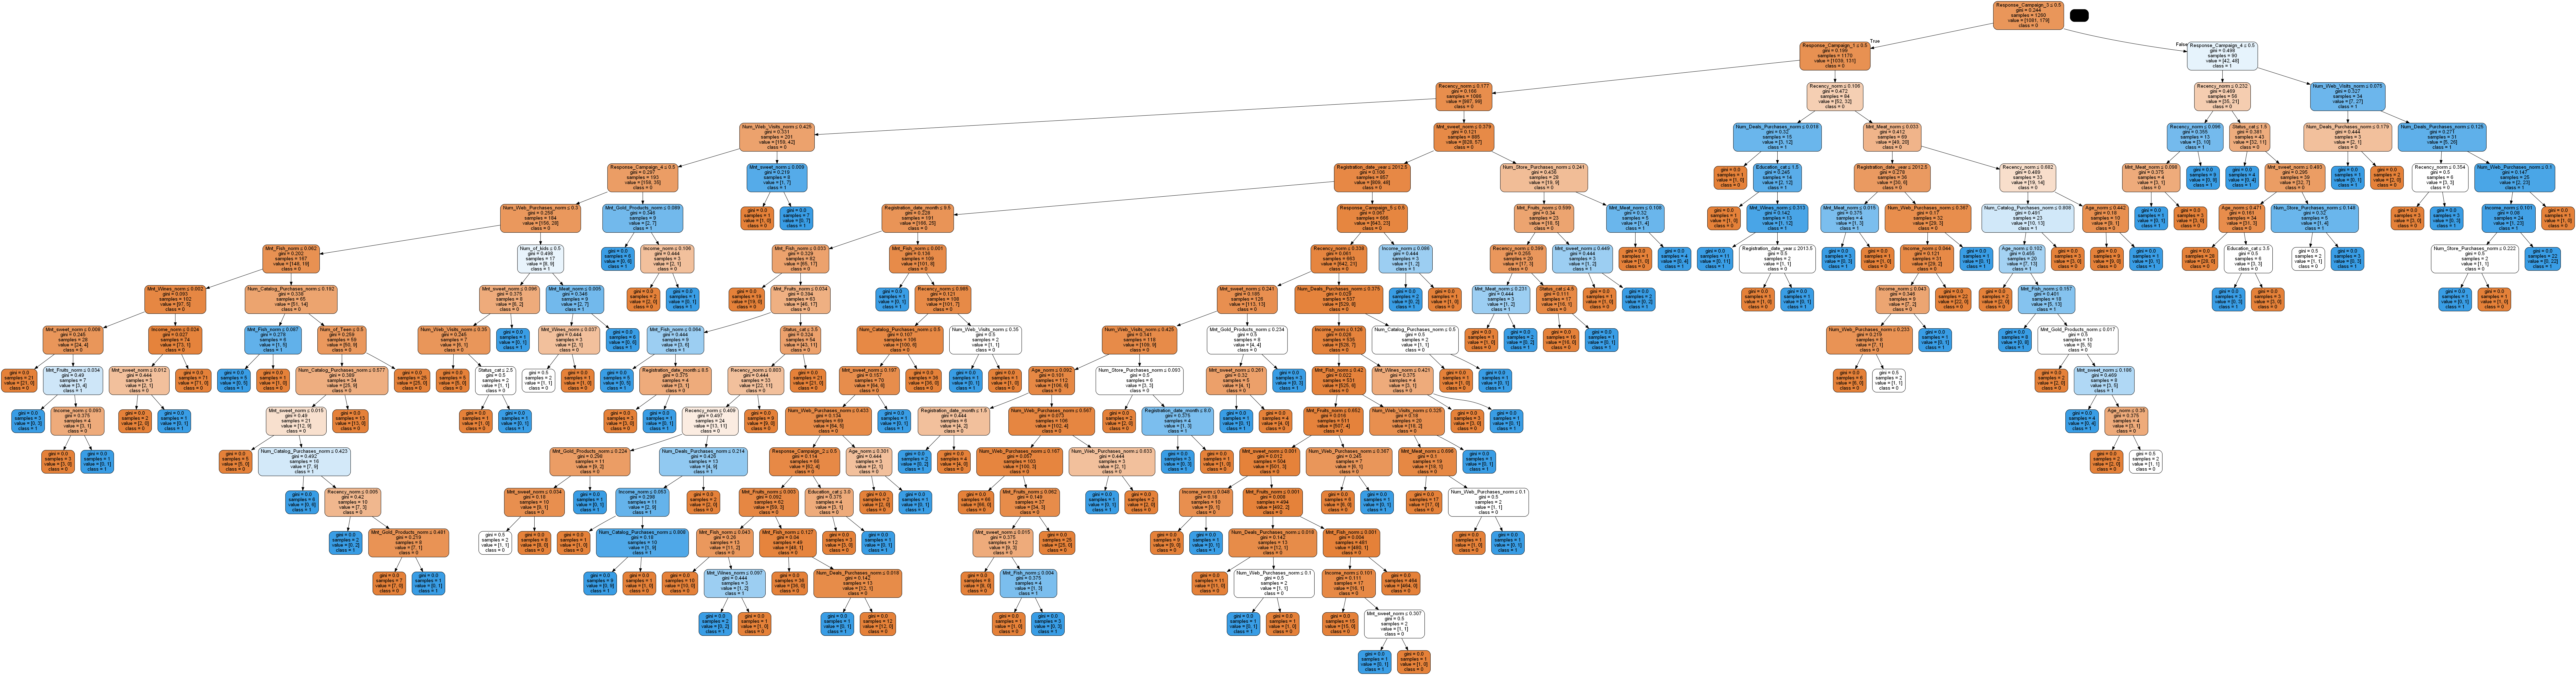

In [94]:
# dot = export_graphviz(clf, filled=True, rounded=True, 
#                 special_characters=True,feature_names = X.columns,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot)  
# graph.write_png('tree1.png')
# Image(graph.create_png())

In [95]:
# ada = ADASYN(random_state = 42)
# x_train_ada, y_train_ada = ada.fit_resample(X_train,y_train)

In [110]:
data = pd.concat([pd.DataFrame(X),pd.DataFrame(y, columns =['Response'])], axis =1)
data.head()

,Num_of_kids,Num_of_Teen,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,...,Num_Web_Visits_norm,Age_norm,Income_norm,Mnt_Fruits_norm,Mnt_Meat_norm,Mnt_sweet_norm,Mnt_Fish_norm,Mnt_Gold_Products_norm,Mnt_Wines_norm,Response
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,...,0.05,0.165049,0.045204,0.000670,0.005025,1.000000,0.002762,0.003802,0.003861,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,...,1.00,0.242718,0.000000,0.000670,0.005025,0.001160,0.002762,0.003802,0.003861,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,...,0.95,0.048544,0.009472,0.048895,0.090452,0.037703,0.005525,0.045627,0.027027,0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,...,0.35,0.281553,0.098625,0.344943,0.236181,0.104408,0.262431,0.361217,0.575290,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,...,0.00,0.135922,0.239231,0.036839,0.080402,0.940255,0.011050,0.011407,0.065637,0


In [101]:
# def plot_data(data):
#     for label in df['y'].unique():
#         row = df[df['y'] == label]
#         plt.scatter(row[0], row[1], label=str(label))
#     plt.legend()
#     plt.show()

In [111]:
n0 = len(data[data['Response']==0])
n1 = len(data[data['Response']==1])
print(n0,n1)

1431 249


In [119]:
smote_oversample = SMOTE(random_state = 1)
smote_X, smote_y = smote_oversample.fit_resample(X, y)

In [120]:
n0 = len(smote_y[smote_y==0])
n1 = len(smote_y[smote_y==1])
print(n0,n1)

1431 1431
